# Exact solution used in MES runs


We would like to MES the operation

$$
\partial_\|^4 f
$$

Using cylindrical geometry.

In [1]:
%matplotlib notebook

from sympy import init_printing
from sympy import S
from sympy import sin, cos, tanh, exp, pi, sqrt

from boutdata.mms import x, y, z, t
from boutdata.mms import DDX

import os, sys
# If we add to sys.path, then it must be an absolute path
common_dir = os.path.abspath('./../../../')
# Sys path is a list of system paths
sys.path.append(common_dir)
from common.python.mesGenerator import get_metric, make_plot, BOUT_print

init_printing()

## Initialize

In [2]:
folder = '../gaussian/'
metric = get_metric()

## Define the variables

In [3]:
# Initialization
the_vars = {}

### Define the function to take the derivative of

In [4]:
# We need Lx
from boututils.options import BOUTOptions
myOpts = BOUTOptions(folder)
Lx = eval(myOpts.geom['Lx'])
Ly = eval(myOpts.geom['Ly'])

In [5]:
# Gaussian with sinus and parabola

# The skew sinus
# In cartesian coordinates we would like a sinus with with a wave-vector in the direction
# 45 degrees with respect to the first quadrant. This can be achieved with a wave vector
# k = [1/sqrt(2), 1/sqrt(2)]
# sin((1/sqrt(2))*(x + y))
# We would like 2 nodes, so we may write
# sin((1/sqrt(2))*(x + y)*(2*pi/(2*Lx)))

# The gaussian
# In cartesian coordinates we would like
# f = exp(-(1/(2*w^2))*((x-x0)^2 + (y-y0)^2))

# A parabola
# In cartesian coordinates, we have
# ((x-x0)/Lx)^2


wx = 0.5*Lx
wy = 0.5*Ly
x0 = 0.3*Lx
y0 = 0.5*Ly
the_vars['f'] = 100*sin((1/sqrt(2))*(x + y)*(2*pi/(2*Lx)))*\
                exp(-(((x-x0)**2/(2*wx**2)) + ((y-y0)**2/(2*wy**2))))*\
                ((x-x0)/Lx)**2

Calculating the solution

In [6]:
the_vars['S'] = the_vars['f'].diff(y, 4)

## Plot

<IPython.core.display.Javascript object>


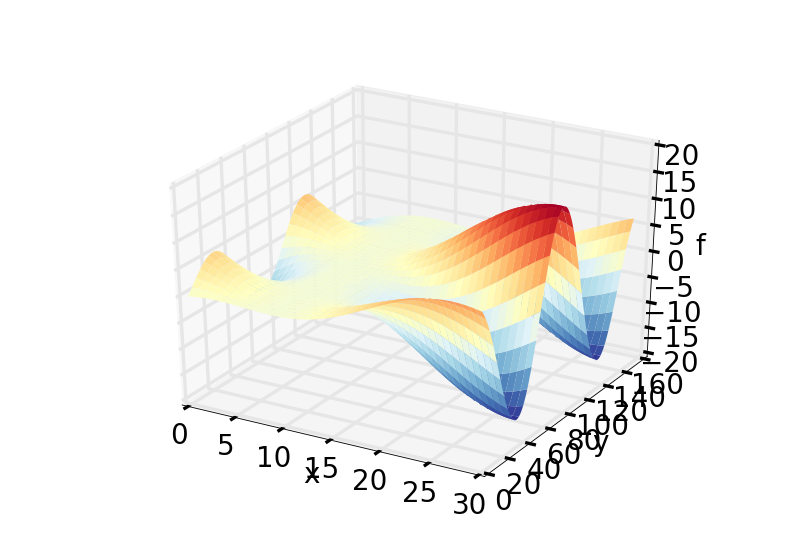

<IPython.core.display.Javascript object>


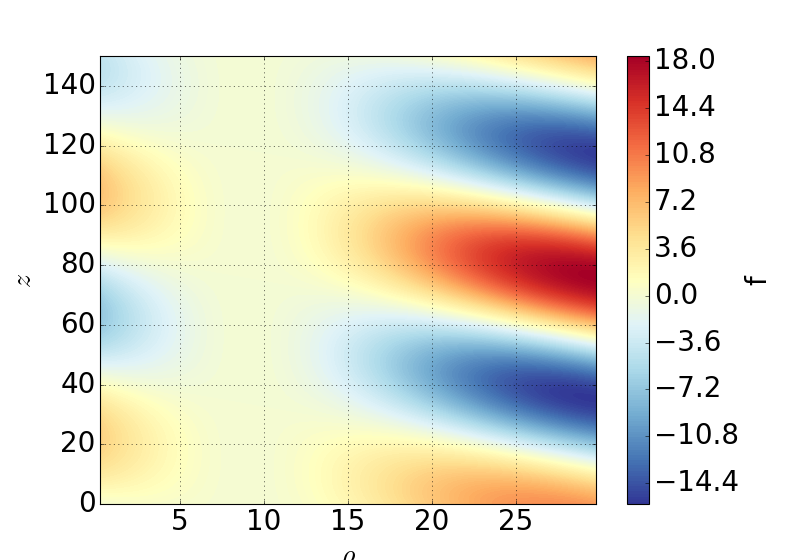

<IPython.core.display.Javascript object>


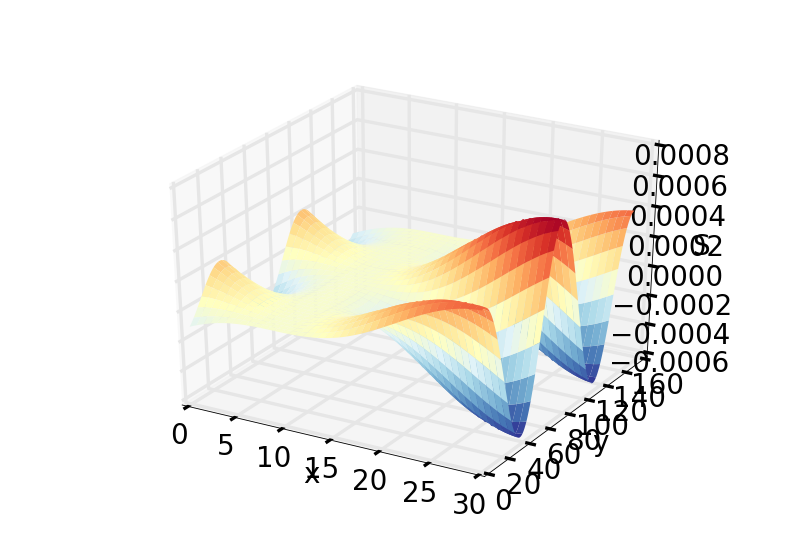

<IPython.core.display.Javascript object>


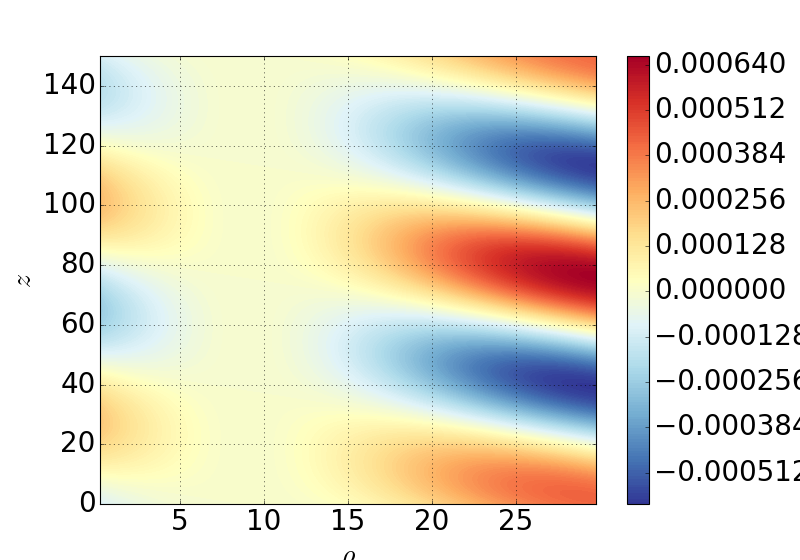

In [7]:
make_plot(folder=folder, the_vars=the_vars, plot2d=True, include_aux=False, save=False, direction='y')

## Print the variables in BOUT++ format

In [8]:
the_vars['neumann'] = the_vars['f'].diff(y)

In [9]:
BOUT_print(the_vars, rational=False)


[f]
100*(geom:xl/30 - 0.3)^2*exp(-0.00222222222222222*(geom:xl - 9.0)^2 - 8.88888888888889e-5*(geom:yl - 75.0)^2)*sin(sqrt(2)*pi*(geom:xl + geom:yl)/60)

[neumann]
100*(geom:xl/30 - 0.3)^2*(-0.000177777777777778*geom:yl + 0.0133333333333333)*exp(-0.00222222222222222*(geom:xl - 9.0)^2 - 8.88888888888889e-5*(geom:yl - 75.0)^2)*sin(sqrt(2)*pi*(geom:xl + geom:yl)/60) + 5*sqrt(2)*pi*(geom:xl/30 - 0.3)^2*exp(-0.00222222222222222*(geom:xl - 9.0)^2 - 8.88888888888889e-5*(geom:yl - 75.0)^2)*cos(sqrt(2)*pi*(geom:xl + geom:yl)/60)/3

[S]
(geom:xl - 9.0)^2*(-3240000*(6.32098765432099e-8*geom:yl - 4.74074074074074e-6)*(0.000177777777777778*geom:yl - 0.0133333333333333)*sin(sqrt(2)*pi*(geom:xl + geom:yl)/60) + 216000*sqrt(2)*pi*(6.32098765432099e-8*geom:yl - 4.74074074074074e-6)*cos(sqrt(2)*pi*(geom:xl + geom:yl)/60) + 3240000*(0.000177777777777778*geom:yl - 0.0133333333333333)^4*sin(sqrt(2)*pi*(geom:xl + geom:yl)/60) - 216000*sqrt(2)*pi*(0.000177777777777778*geom:yl - 0.0133333333333333)^3*cos(sqr